## Lab | Cleaning numerical data


In [1]:
# 1. Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
# 3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
customer_df = customer_df.rename(columns=str.lower)

In [5]:
customer_df.columns = customer_df.columns.str.replace(' ','_')

In [6]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [7]:
# 5. Change effective to date column to datetime format
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])

C:\Users\samba\AppData\Local\Temp\ipykernel_16628\1816921832.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'])


In [8]:
# 6. Create a NEW dataframe using only the numerical data called numerical_df.
numerical_df = customer_df.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [9]:
# 7. Define a function that differentiates between continuous and discrete variables.
def diff_cont_descrete(num_df,customer_df):
        continuous_vars = []
        discrete_vars = []
        for col in num_df.columns:
            if (num_df[col].nunique()/len(customer_df) >= 0.02):
                continuous_vars.append(col)
            else:
                discrete_vars.append(col)
                
        return continuous_vars, discrete_vars
            
#             num_df.nunique()/len(customer_df)

continuous_vars, discrete_vars = diff_cont_descrete(numerical_df,customer_df)

continuous_df = numerical_df[continuous_vars]
discrete_df = numerical_df[discrete_vars]
display(continuous_df)
display(discrete_df)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


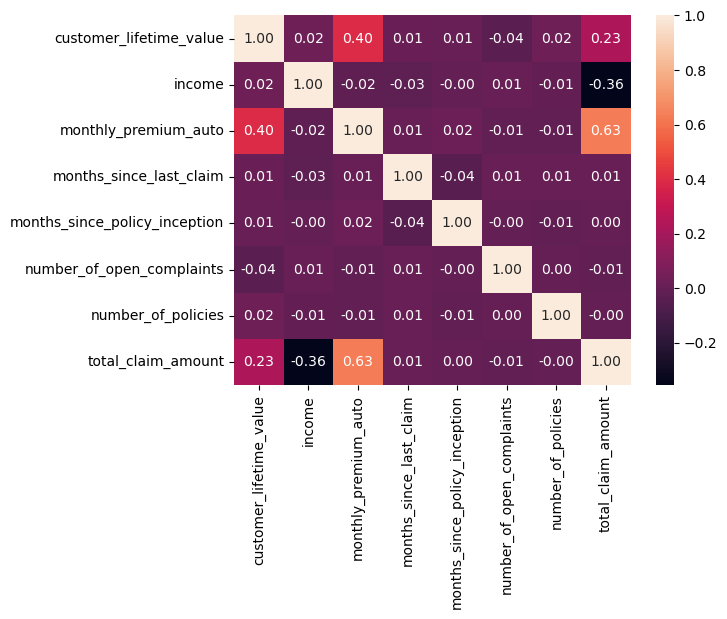

In [10]:
# 8. Plot a correlation matrix, comment what you se
# good co relation between customer life time value and total claim amount. Another 
# one monthly premium auto and customer life time value
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f")  
plt.show()

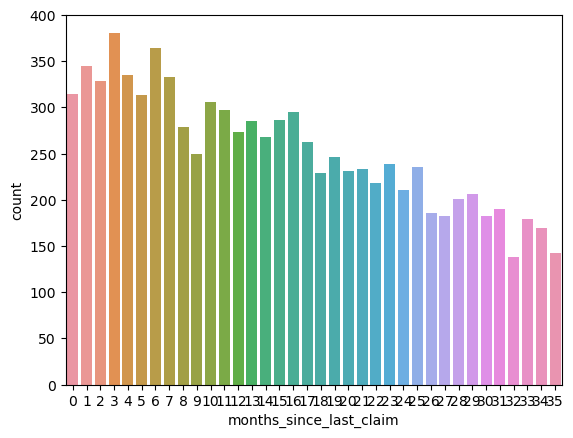

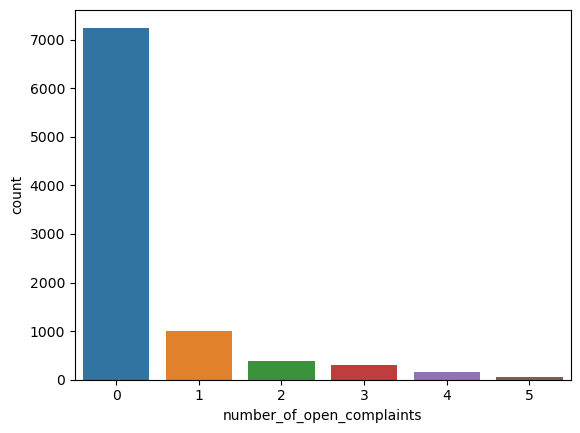

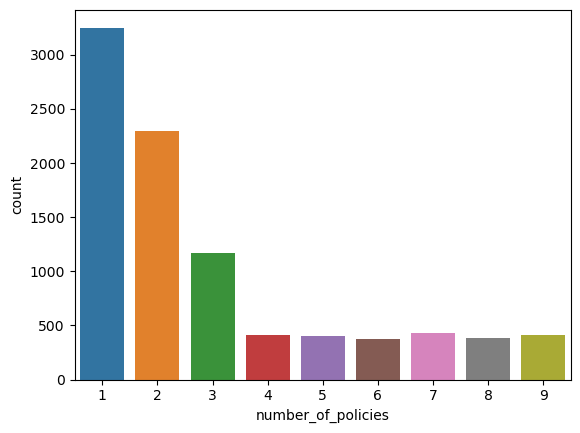

In [11]:
# 9. Create a function to plot every discrete variable
discrete_df = customer_df[['months_since_last_claim','number_of_open_complaints','number_of_policies']]

def plot_graph(df, dtype='descrete'):
    
    match dtype:
        case "continues":
            for col in df:
                sns.histplot(data=df, x=col, kde=True)
                plt.show()
        case "boxplot":
            for col in df:
                sns.boxplot(y=df[col])
                plt.show()
        case _:
            for col in df:
                sns.countplot(x=col, data=df)
                plt.show()
                
plot_graph(discrete_df)

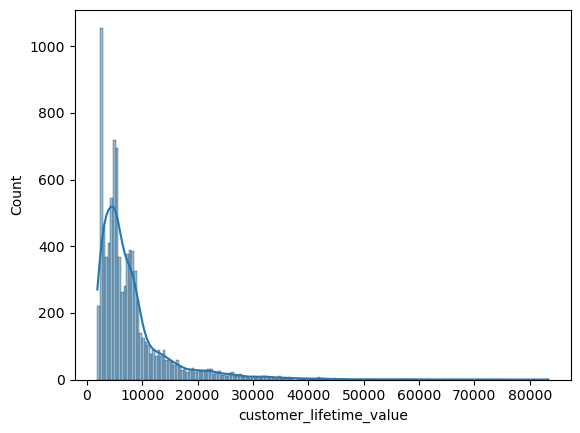

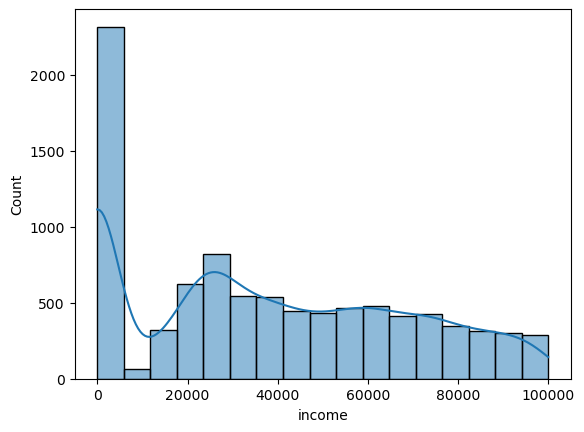

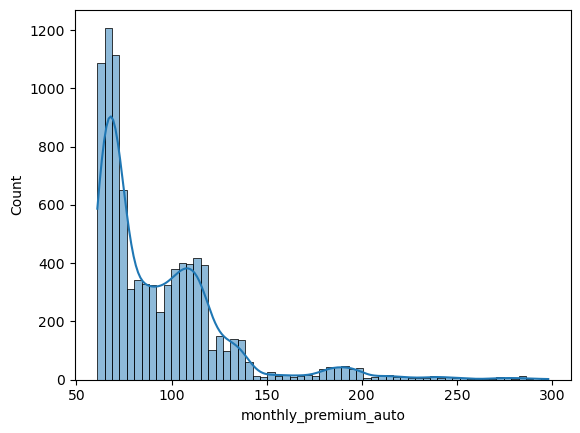

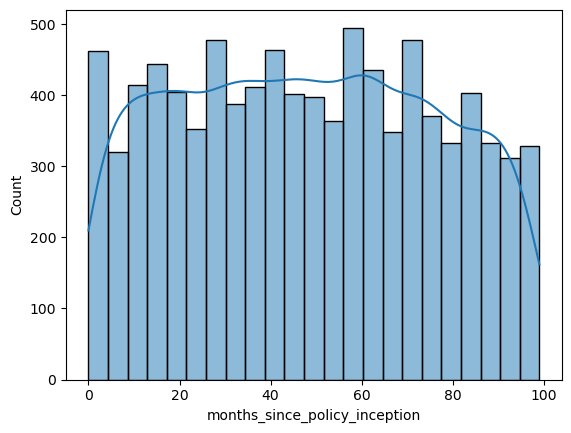

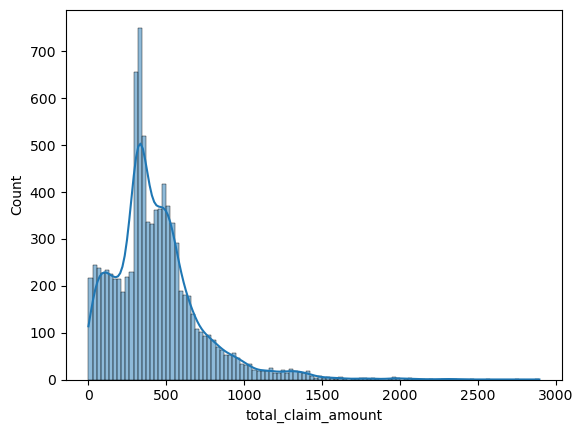

In [12]:
continues_df = numerical_df.drop(discrete_df, axis=1)
plot_graph(continues_df,'continues')

In [13]:
# 10. Comment what you can see in the plots
# customer life time value, monthly premium value and total claim amount right sckewed

In [14]:
# 11. Look for outliers in the continuous variables
for col in continues_df:
    iqr = np.nanpercentile(continues_df[col],75) - np.nanpercentile(continues_df[col],25)
    upper_limit = np.nanpercentile(continues_df[col],75) + 1.5*iqr
    extraordinary_points = continues_df[continues_df[col] > upper_limit]    
    print(col + ":" + str(len(extraordinary_points)))

customer_lifetime_value:817
income:0
monthly_premium_auto:430
months_since_policy_inception:0
total_claim_amount:453


In [15]:
# 12. There is no outliers for the numerical columns

In [16]:
# 13. Check all columns for NaN values
numerical_df.isnull().sum()/len(numerical_df)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

In [17]:
# 14. Save the numerical_df to csv as numerical.csv
numerical_df.to_csv('files_for_lab/numerical.csv', index=False) 

## Lab | Cleaning categorical data

In [18]:
# 1. Open the notebook created for Lab-cleaning-numerical-data.
# 2. Find all of the categorical data. Save it in a categorical_df variable.
categorical_df = customer_df.select_dtypes(object)
display(categorical_df.shape)
display(categorical_df.head(5))

(9134, 15)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Insights into categorical data
column | decision
-------|---------
state | only 5 - leave as is
response | imbalanced make 1,0
coverage| ordinal encode
education | combine master & dr.
employment status | smallest 3 into other
gender | 1hot encode
location | ordinal encode as is
marital | 1hot encode as is
policy type | combine corporate/special
policy | drop column
renew offer | encode as is
sales channel | 1hot encode as is
vehicle class | 1hot combine luxury/sports
vehicle size | ordinal encode

In [19]:
# 3. Check for NaN values and decide what to do with them, do it now.
categorical_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [20]:
# 4. Check all unique values of columns.
categorical_df = categorical_df.drop('customer', axis=1)

for col in categorical_df.columns:
    unique_values = categorical_df[col].unique()
    display(f"Unique values in column '{col}': {unique_values}")

"Unique values in column 'state': ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']"

"Unique values in column 'response': ['No' 'Yes']"

"Unique values in column 'coverage': ['Basic' 'Extended' 'Premium']"

"Unique values in column 'education': ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']"

"Unique values in column 'employmentstatus': ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']"

"Unique values in column 'gender': ['F' 'M']"

"Unique values in column 'location_code': ['Suburban' 'Rural' 'Urban']"

"Unique values in column 'marital_status': ['Married' 'Single' 'Divorced']"

"Unique values in column 'policy_type': ['Corporate Auto' 'Personal Auto' 'Special Auto']"

"Unique values in column 'policy': ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'\n 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']"

"Unique values in column 'renew_offer_type': ['Offer1' 'Offer3' 'Offer2' 'Offer4']"

"Unique values in column 'sales_channel': ['Agent' 'Call Center' 'Web' 'Branch']"

"Unique values in column 'vehicle_class': ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'\n 'Luxury Car']"

"Unique values in column 'vehicle_size': ['Medsize' 'Small' 'Large']"

In [21]:
# 5. Check dtypes. Do they all make sense as categorical data?
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [22]:
# 6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.
mixed_columns = []
for col in categorical_df.columns:
    mixed_data = categorical_df[col].apply(lambda x: any(char.isalpha() for char in str(x)) and any(char.isdigit() for char in str(x)))
    if mixed_data.any():
        mixed_columns.append(col)
        
print(mixed_columns)

['policy', 'renew_offer_type']


### 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

#### Dummy code for ordinal encoding

#### data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [23]:
categorical_df["coverage"].value_counts()

coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

In [24]:
categorical_df["coverage"] = categorical_df["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})

In [25]:
categorical_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [26]:
categorical_df["employmentstatus"] = categorical_df["employmentstatus"].map({"Medical Leave" : 0, "Disabled" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":2})

In [27]:
categorical_df["education"].value_counts()

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

In [28]:
categorical_df["education"] = categorical_df["education"].map({"High School or Below" : 0, "Bachelor" : .5, "College":.5, "Master" : 1, "Doctor":1})

In [29]:
categorical_df["location_code"] =categorical_df["location_code"].map({"Rural" : 0, "Suburban" :.5, "Urban" : 1,})
categorical_df["vehicle_size"] =categorical_df["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})

In [30]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,0.5
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,0.5
2,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,0.5
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,0.5
4,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,0.5


In [31]:
# 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
categorical_df.groupby(['policy_type','policy']).size().reset_index(name='count')

,policy_type,policy,count
0,Corporate Auto,Corporate L1,359
1,Corporate Auto,Corporate L2,595
2,Corporate Auto,Corporate L3,1014
3,Personal Auto,Personal L1,1240
4,Personal Auto,Personal L2,2122
5,Personal Auto,Personal L3,3426
6,Special Auto,Special L1,66
7,Special Auto,Special L2,164
8,Special Auto,Special L3,148


In [32]:
# 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your 
# thoughts and make those changes.
for col in categorical_df.columns:
    num_unique_values = categorical_df[col].nunique()
    print(f"Number of unique values in column '{col}': {num_unique_values}")

Number of unique values in column 'state': 5
Number of unique values in column 'response': 2
Number of unique values in column 'coverage': 3
Number of unique values in column 'education': 3
Number of unique values in column 'employmentstatus': 3
Number of unique values in column 'gender': 2
Number of unique values in column 'location_code': 3
Number of unique values in column 'marital_status': 3
Number of unique values in column 'policy_type': 3
Number of unique values in column 'policy': 9
Number of unique values in column 'renew_offer_type': 4
Number of unique values in column 'sales_channel': 4
Number of unique values in column 'vehicle_class': 6
Number of unique values in column 'vehicle_size': 3


In [33]:
# 10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.
categorical_df.to_csv("files_for_lab/categorical.csv", index=False)

## Lab | Feature extraction

In [34]:
# 1. Open the categorical dataframe we created before
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,0.5
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,0.5
2,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,0.5
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,0.5
4,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0.0,0.5,2.0,M,1.0,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,0.5
9130,California,Yes,0.5,0.5,2.0,F,0.5,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,0.5
9131,California,No,0.5,0.5,0.0,M,0.5,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,0.5
9132,California,No,0.5,0.5,2.0,M,0.5,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,1.0


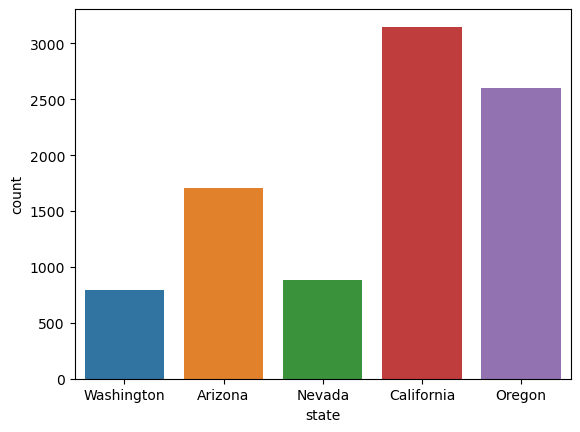

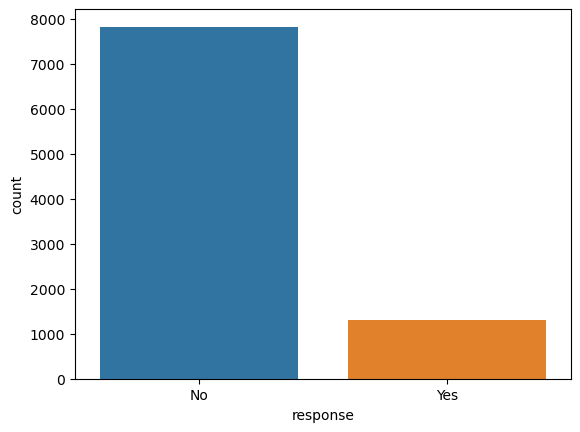

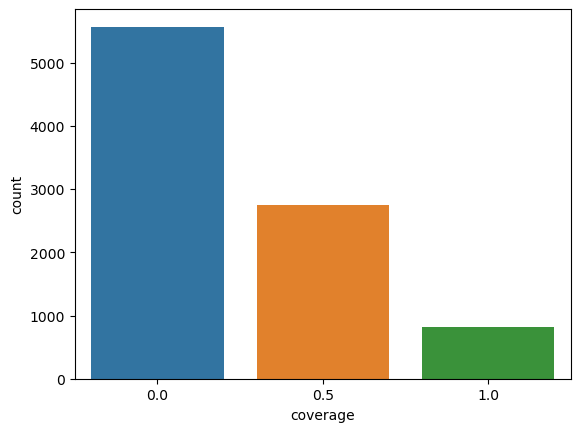

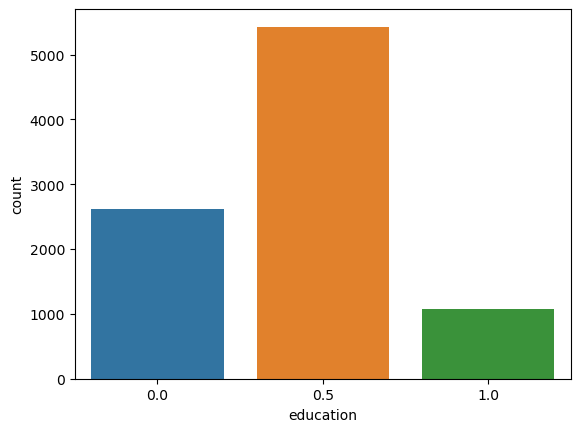

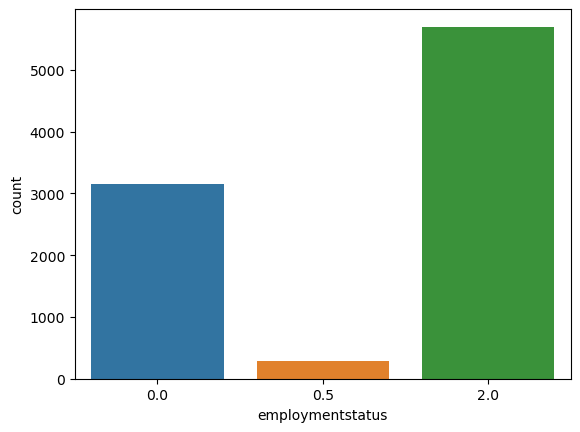

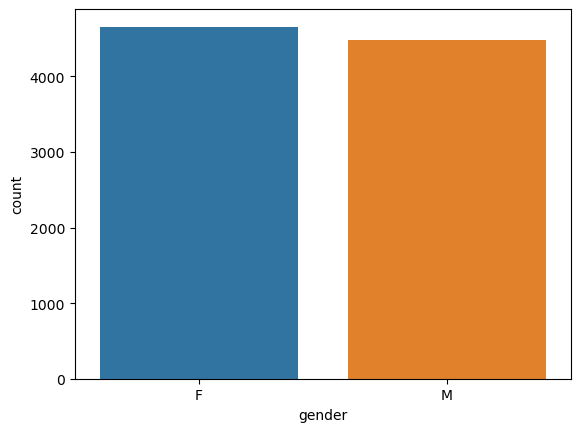

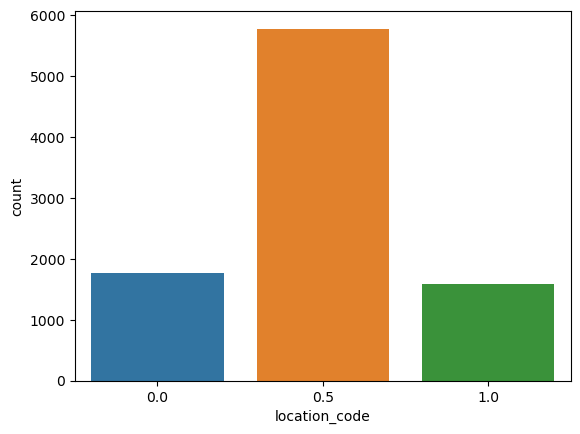

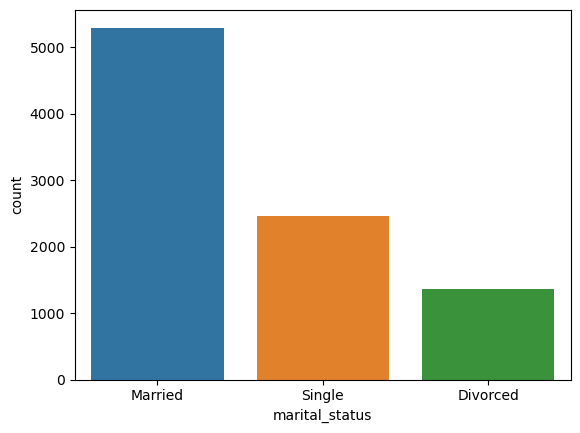

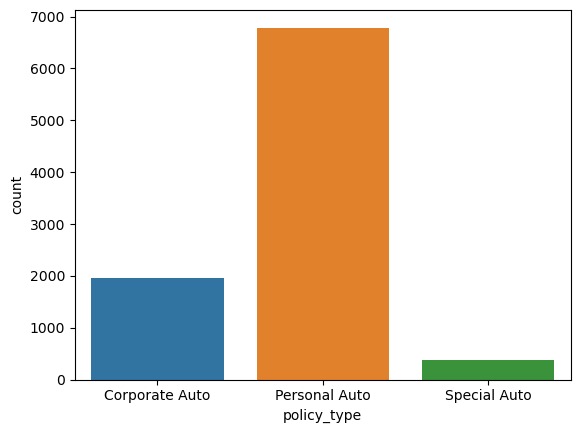

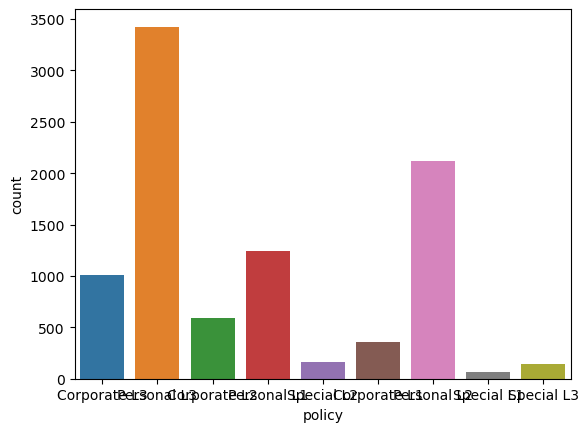

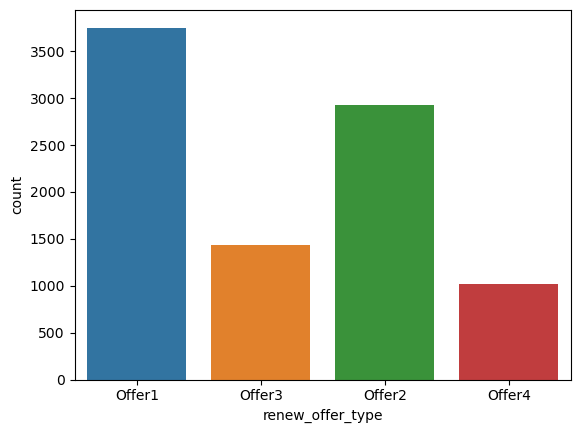

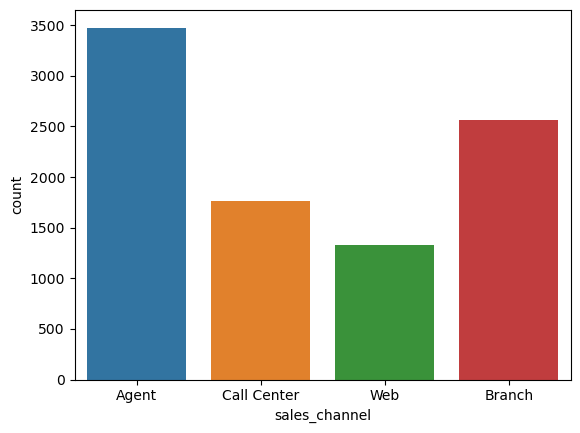

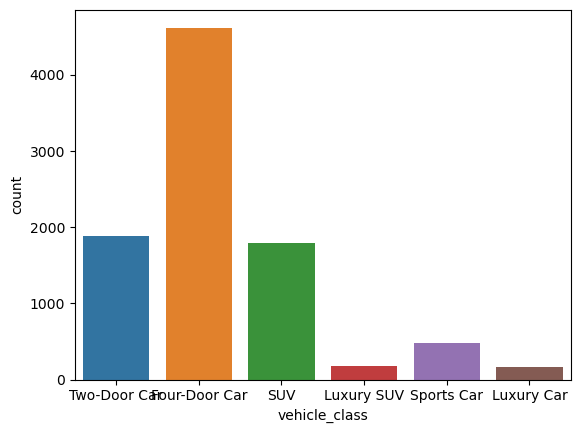

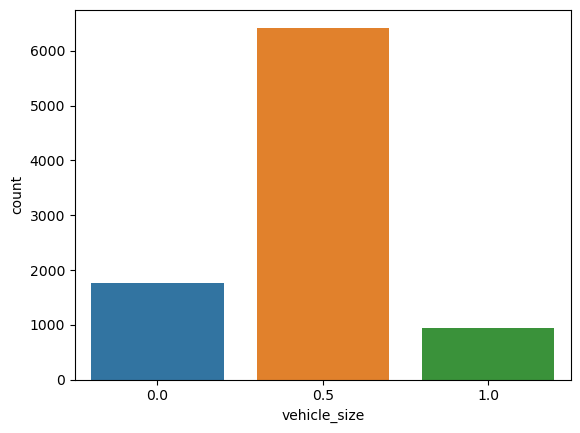

In [35]:
# 2. Plot all the categorical variables with the proper plot. What can you see?
plot_graph(categorical_df)

In [36]:
# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
categorical_df.groupby(['policy_type','policy']).size().reset_index(name='count')
# The following table shows that policy_type and plocy contain same information. so in this case it is very much feasible to drop any of them. 
# I decided to drop policy_type 

,policy_type,policy,count
0,Corporate Auto,Corporate L1,359
1,Corporate Auto,Corporate L2,595
2,Corporate Auto,Corporate L3,1014
3,Personal Auto,Personal L1,1240
4,Personal Auto,Personal L2,2122
5,Personal Auto,Personal L3,3426
6,Special Auto,Special L1,66
7,Special Auto,Special L2,164
8,Special Auto,Special L3,148


In [37]:
categorical_df = categorical_df.drop('policy_type', axis=1)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate L3,Offer1,Agent,Two-Door Car,0.5
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal L3,Offer3,Agent,Four-Door Car,0.5
2,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal L3,Offer1,Agent,Two-Door Car,0.5
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate L2,Offer1,Call Center,SUV,0.5
4,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal L1,Offer1,Agent,Four-Door Car,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0.0,0.5,2.0,M,1.0,Married,Personal L1,Offer2,Web,Four-Door Car,0.5
9130,California,Yes,0.5,0.5,2.0,F,0.5,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,0.5
9131,California,No,0.5,0.5,0.0,M,0.5,Single,Corporate L2,Offer1,Branch,Four-Door Car,0.5
9132,California,No,0.5,0.5,2.0,M,0.5,Married,Personal L2,Offer3,Branch,Four-Door Car,1.0


In [38]:
categorical_df.to_csv("files_for_lab/categorical_with_out_redandent.csv", index=False)

In [39]:
# 4. Plot time variable. Can you extract something from it?
# 5. The time variable can be useful. You shoud transform its data into a more useful form. 
# Hint: Day, week, and month as integers might be useful.

customer_df["month"] = customer_df['effective_to_date'].dt.month
customer_df["weekday"] = customer_df['effective_to_date'].dt.weekday
customer_df["day_name"] = customer_df['effective_to_date'].dt.day_name()
customer_df["day"] = customer_df['effective_to_date'].dt.day
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,weekday,day_name,day
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,3,Thursday,24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,0,Monday,31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,5,Saturday,19
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,3,Thursday,20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3,Thursday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2,3,Thursday,10
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2,5,Saturday,12
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2,6,Sunday,6
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2,3,Thursday,3


In [40]:
customer_df_month_income = pd.pivot_table(customer_df, index=['month'], values='income', aggfunc="sum").reset_index()

customer_df_month_income


,month,income
0,1,184422520
1,2,159539989


<Axes: xlabel='month'>

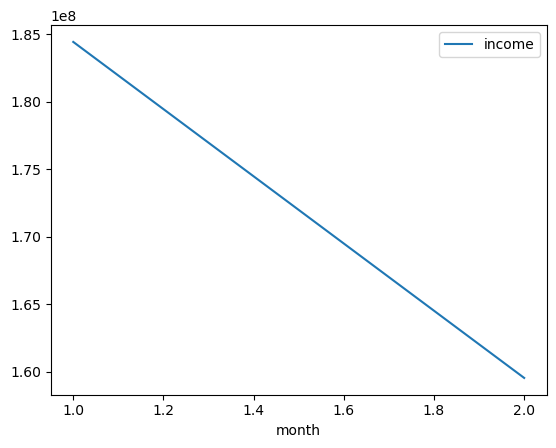

In [41]:
customer_df_month_income.plot("month","income")

<Axes: xlabel='day'>

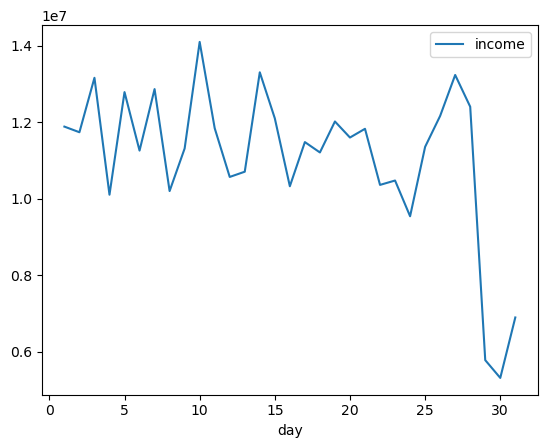

In [42]:
customer_df_day_income = pd.pivot_table(customer_df, index=['day'], values='income', aggfunc="sum").reset_index()

customer_df_day_income.plot("day","income")

<Axes: xlabel='day_name'>

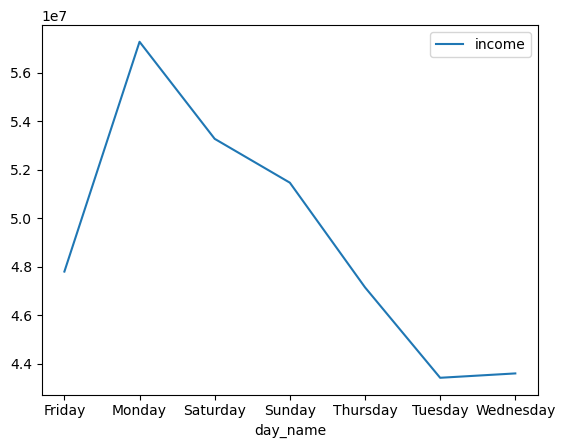

In [43]:
customer_df_day_name_income = pd.pivot_table(customer_df, index=['day_name'], values='income', aggfunc="sum").reset_index()

customer_df_day_name_income.plot("day_name","income")

<Axes: xlabel='day_name'>

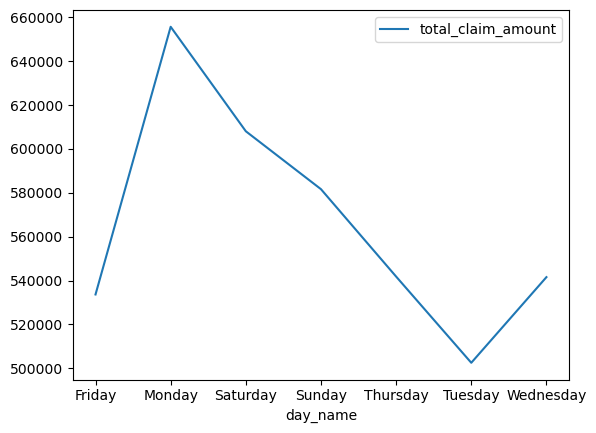

In [44]:
customer_df_day_name_claim = pd.pivot_table(customer_df, index=['day_name'], values='total_claim_amount', aggfunc="sum").reset_index()

customer_df_day_name_claim.plot("day_name","total_claim_amount")

## Lab | Comparing regression models

In [45]:
# 1. Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target
data = pd.concat([numerical_df,categorical_df], axis=1)
data.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
state                             object
response                          object
coverage                         float64
education                        float64
employmentstatus                 float64
gender                            object
location_code                    float64
marital_status                    object
policy                            object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                     float64
dtype: object

In [46]:
y = data['total_claim_amount']
X = data.drop('total_claim_amount', axis=1)

In [47]:
# 1. Import sklearn train_test_split and separate the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [48]:
# 2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
X_train_num = X_train.select_dtypes(np.number)
X_test_num  = X_test.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat  = X_test.select_dtypes(object)
X_test_cat

,state,response,gender,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
8262,California,No,F,Married,Personal L2,Offer4,Agent,Sports Car
3400,California,No,M,Married,Personal L3,Offer2,Call Center,Four-Door Car
7077,California,No,F,Married,Personal L3,Offer2,Agent,SUV
2906,California,Yes,F,Married,Corporate L2,Offer2,Call Center,Four-Door Car
4690,Arizona,No,M,Single,Personal L3,Offer3,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...
4173,Washington,No,F,Divorced,Special L2,Offer2,Agent,Four-Door Car
3341,Arizona,No,M,Married,Personal L3,Offer3,Call Center,Four-Door Car
3652,Oregon,No,F,Married,Personal L1,Offer2,Agent,Four-Door Car
8892,California,No,M,Single,Personal L3,Offer2,Web,Four-Door Car


In [49]:
# 3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num

from sklearn.preprocessing import MinMaxScaler
# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
0,0.214185,0.227929,0.037975,0.314286,0.686869,0.0,0.125,0.0,0.5,1.00,1.0,0.5
1,0.005043,0.208191,0.000000,0.942857,0.616162,0.0,0.000,0.0,0.5,0.00,0.5,0.5
2,0.008107,0.000000,0.046414,0.200000,0.777778,0.0,0.000,0.0,0.0,0.00,0.5,0.0
3,0.126940,0.000000,0.236287,0.428571,0.686869,0.0,0.125,0.0,0.0,0.00,0.5,0.5
4,0.068202,0.262492,0.016878,0.314286,0.393939,0.0,0.125,0.0,0.0,0.00,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.333447,0.210782,0.565401,0.171429,0.474747,0.0,0.125,1.0,0.5,0.00,0.5,0.0
7303,0.037743,0.988225,0.265823,0.200000,0.363636,0.2,0.000,0.5,0.5,1.00,0.0,0.5
7304,0.156427,0.000000,0.329114,0.142857,0.565657,0.0,0.125,0.5,0.5,0.00,0.5,0.5
7305,0.079637,0.196907,0.236287,0.485714,0.414141,0.2,1.000,0.0,0.0,0.25,0.5,0.5


In [50]:
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)
X_test_norm

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
0,0.087224,0.281190,0.223629,0.171429,0.272727,0.0,0.250,0.0,0.0,1.0,0.5,0.5
1,0.007993,0.473645,0.016878,0.171429,0.353535,0.0,0.000,0.0,0.5,1.0,0.5,0.0
2,0.027918,0.367373,0.189873,0.371429,0.181818,0.2,0.000,0.0,0.5,1.0,0.5,0.5
3,0.010122,0.175829,0.042194,0.828571,0.707071,0.0,0.000,0.0,0.5,0.0,0.5,0.5
4,0.034832,0.000000,0.025316,0.200000,0.757576,0.0,0.500,0.0,0.5,0.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.035082,0.308981,0.000000,0.228571,0.363636,0.0,0.625,0.0,0.5,1.0,0.0,0.5
1823,0.067347,0.548994,0.147679,0.142857,0.111111,0.6,1.000,0.5,0.5,1.0,0.0,0.5
1824,0.012247,0.720421,0.046414,0.685714,0.585859,0.0,0.000,0.0,0.0,1.0,1.0,0.5
1825,0.019061,0.681086,0.113924,0.685714,0.535354,0.0,0.000,0.5,0.5,1.0,0.0,0.5


In [51]:
# 4.Encode the categorical variables X_train_cat

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat)  
encoded = encoder.transform(X_train_cat).toarray()
column_names = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
X_train_cat_encoded = pd.DataFrame(encoded, columns=column_names)
X_train_cat_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
X_test_cat_encoded_data = encoder.transform(X_test_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded_data, columns=cols)
X_test_cat_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
X_train_num_cat_norm = pd.concat([X_train_norm , X_train_cat_encoded], axis=1)
X_train_num_cat_norm.shape

(7307, 39)

In [54]:
# 5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
X_train_num_cat_norm

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.214185,0.227929,0.037975,0.314286,0.686869,0.0,0.125,0.0,0.5,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005043,0.208191,0.000000,0.942857,0.616162,0.0,0.000,0.0,0.5,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008107,0.000000,0.046414,0.200000,0.777778,0.0,0.000,0.0,0.0,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.126940,0.000000,0.236287,0.428571,0.686869,0.0,0.125,0.0,0.0,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.068202,0.262492,0.016878,0.314286,0.393939,0.0,0.125,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.333447,0.210782,0.565401,0.171429,0.474747,0.0,0.125,1.0,0.5,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7303,0.037743,0.988225,0.265823,0.200000,0.363636,0.2,0.000,0.5,0.5,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7304,0.156427,0.000000,0.329114,0.142857,0.565657,0.0,0.125,0.5,0.5,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7305,0.079637,0.196907,0.236287,0.485714,0.414141,0.2,1.000,0.0,0.0,0.25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [55]:
y_train.shape

(7307,)

In [56]:
X_test_num_cat_norm = pd.concat([X_test_norm , X_test_cat_encoded], axis=1)
X_test_num_cat_norm.shape

(1827, 39)

In [57]:
y_test.shape

(1827,)

In [58]:
# 6. Try a simple linear regression with all the data to see whether we are getting good results.
from sklearn import linear_model
from sklearn.metrics import r2_score

lr = linear_model.LinearRegression()
lr.fit(X_train_num_cat_norm,y_train)

predictions_train = lr.predict(X_train_num_cat_norm)
display(r2_score(y_train, predictions_train))

predictions_test = lr.predict(X_test_num_cat_norm)
display(r2_score(y_test, predictions_test))

0.6239313577673298

0.6448756223701354

In [59]:
# 7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them 
# without repeating code.

'''
paremeters
X_train : scalled, encoded train data
X_test : scaled, encoded test data
y_train : target train data
y_test : taeget test data
model : model variable i.e. lr = linear_model.LinearRegression()
'''
def prediction_on_model(X_train, X_test, y_train, y_test, model):
    
    for m in model:
        
        m.fit(X_train,y_train)

        print('Model:' , m )
        predictions_train = m.predict(X_train)
        print('Train Score: ', round(r2_score(y_train, predictions_train),2))

        predictions_test = m.predict(X_test)
        print('Test Score: ', round(r2_score(y_test, predictions_test),2))

In [60]:
# 8. Use the function to check LinearRegressor and KNeighborsRegressor
# 9. You can check also the MLPRegressor for this task!

'''
before calling the function prediction_on_model import necessary module and package just bellow
'''
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

ml = [
    linear_model.LinearRegression(),
    KNeighborsRegressor(n_neighbors=3,weights='distance', metric='manhattan', algorithm='auto'),
    MLPRegressor(random_state=1, max_iter=500)
     ]

prediction_on_model(X_train_num_cat_norm, X_test_num_cat_norm, y_train, y_test, ml)

Model: LinearRegression()
Train Score:  0.62
Test Score:  0.64
Model: KNeighborsRegressor(metric='manhattan', n_neighbors=3, weights='distance')
Train Score:  1.0
Test Score:  0.5
Model: MLPRegressor(max_iter=500, random_state=1)
Train Score:  0.82
Test Score:  0.84


C:\Users\samba\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
# 10. Check and discuss the results.

The multilayer perceptron is working fine compare to the others two algorithms linear regression and kneighbores. kneighbores is overfitted for the training data, thats why the test score is not good. Linear regression give significant score for train and test data 

## Random variable Distributions

Instructions

Get the numerical variables from our dataset.

Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [62]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


C:\Users\samba\AppData\Local\Temp\ipykernel_16628\33975514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_df[column])


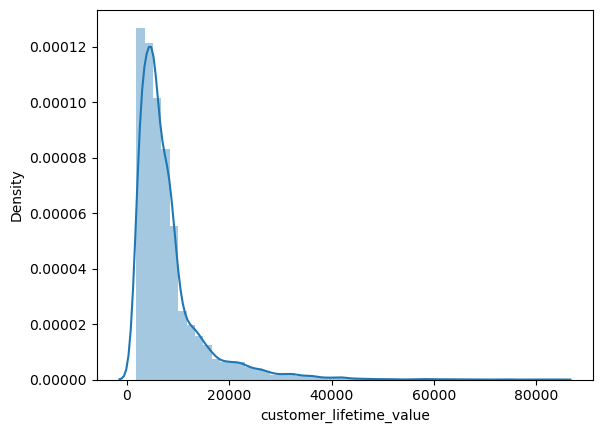

C:\Users\samba\AppData\Local\Temp\ipykernel_16628\33975514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_df[column])


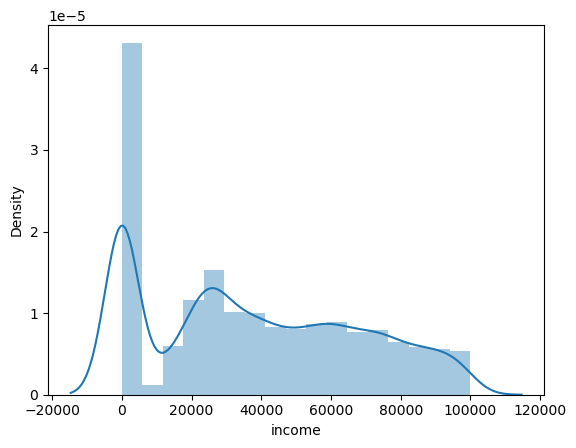

C:\Users\samba\AppData\Local\Temp\ipykernel_16628\33975514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_df[column])


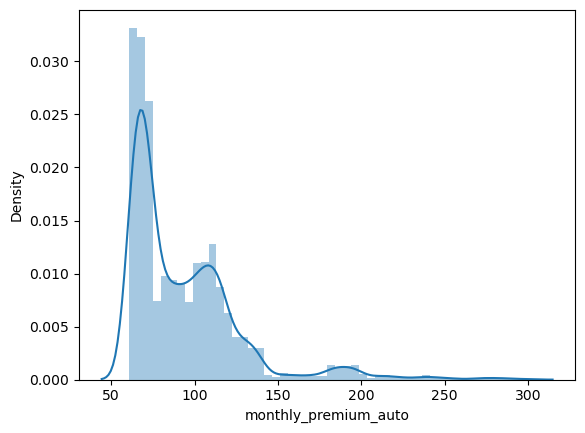

C:\Users\samba\AppData\Local\Temp\ipykernel_16628\33975514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_df[column])


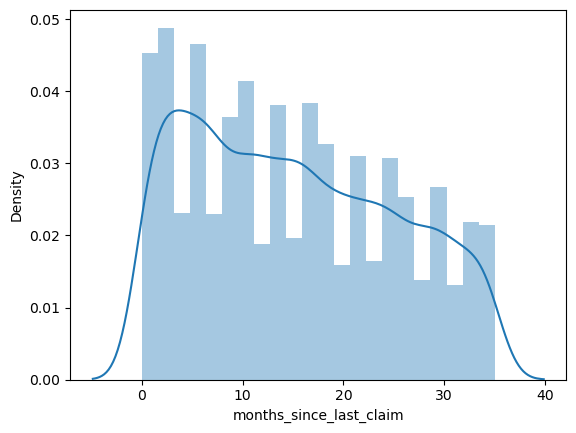

C:\Users\samba\AppData\Local\Temp\ipykernel_16628\33975514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_df[column])


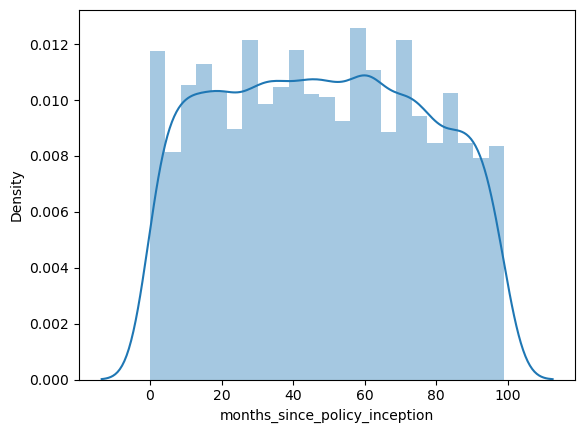

C:\Users\samba\AppData\Local\Temp\ipykernel_16628\33975514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_df[column])


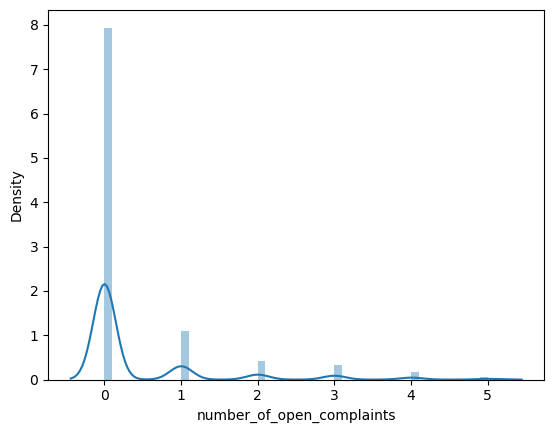

C:\Users\samba\AppData\Local\Temp\ipykernel_16628\33975514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_df[column])


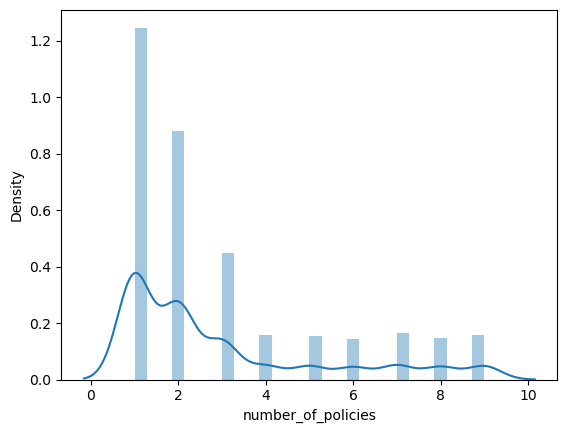

C:\Users\samba\AppData\Local\Temp\ipykernel_16628\33975514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_df[column])


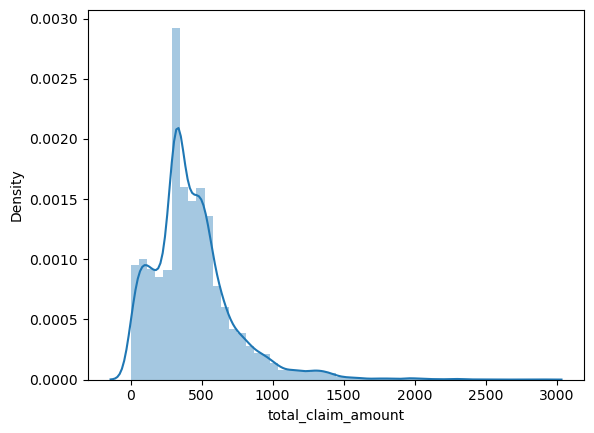

In [63]:
for column in numerical_df:
    sns.distplot(numerical_df[column])
    plt.show()

In [64]:
numerical_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

## column	distribution
column | distribution
-------|---------
customer_lifetime_value	|looks exponential / continuous
income	| closer to normal
monthly_premium_auto  |	closer to normal
months_since_last_claim	| closer to normal
months_since_policy_inception |	closer to normal
number_of_open_complaints |	closer to normal
number_of_policies |	closer to normal
total_claim_amount |	looks exponential / continuous